Name: Bongwoo Jeon

Student ID: 01874516

The purpose of this project is to study and understand n-step Temporal Difference Methods.

In [1]:
import gym
import sys 
import os
import pandas as pd
sys.path.append(os.path.abspath("/Users/qhddn/RL class/Mid-term project"))
import mid_project

>I imported gym package to use Blackjack, Taxi, CliffWalking, FrozenLake which are parts of Toy Text environments.
Also, I imported sys and os packages to use my n-step SARSA algorithm in a python file (mid_project.py) on this jupyter notebook file.

In [2]:
env_blackjack = gym.make("Blackjack-v1", natural=False, sab=False)
env_taxi = gym.make("Taxi-v3")
env_cliff = gym.make("CliffWalking-v0")
env_frozen = gym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=True)

>I implemented Blackjack, Taxi, CliffWalking, FrozenLake environments. And I use the default settings for each environment.

## Blackjack

**Description**

Card Values:

- Face cards (Jack, Queen, King) have a point value of 10.
- Aces can either count as 11 (called a ‘usable ace’) or 1.
- Numerical cards (2-9) have a value equal to their number.

This game is played with an infinite deck (or with replacement). The game starts with the dealer having one face up and one face down card, while the player has two face up cards.

The player can request additional cards (hit, action=1) until they decide to stop (stick, action=0) or exceed 21 (bust, immediate loss). After the player sticks, the dealer reveals their facedown card, and draws until their sum is 17 or greater. If the dealer goes bust, the player wins. If neither the player nor the dealer busts, the outcome (win, lose, draw) is decided by whose sum is closer to 21.

**Action Space**

There are two actions: 
- stick (0)
- hit (1)

**Observation Space**

The observation consists of a 3-tuple containing: the player’s current sum, the value of the dealer’s one showing card (1-10 where 1 is ace), and whether the player holds a usable ace (0 or 1).

**Rewards**
- win: +1
- lose: -1
- draw: 0

In [3]:
blackjack = mid_project.n_step_SARSA(env_blackjack, n_episode=500, alpha=0.4, gamma=1.0, epsilon=0.01, n=16, tag="Blackjack")
q_blackjack, policy_blackjack, rewards_blackjack, num_step = blackjack.play()   

> I set the number of episodes(num_eps) to 500, and $\alpha$ value of 0.4, $\gamma$ value of 1.0, $\varepsilon$ value of 0.01, and n value of 16. $\varepsilon$ shrinks as the number of episodes progresses. It would be good to start with 1 and go down to at least 0.01. But my selection is 0.01. I picked $\gamma$ to 1.0 because Blackjack has environment where there is no randomness. $\alpha$ and n must be related. If n is 1, then it is a function of the problem as a one-step Sarsa. If n is greater than the number of steps in one episode, the algorithm will be Monte Carlo. This environment must be completed at least before 16 steps, so they can be used below 16 steps. For n, I used the $\alpha$ value of 0.4 until I understand the tuning method better. And I added tag parameter for each task to distinguish it because there are different size of maps for optimal policy in each environment.

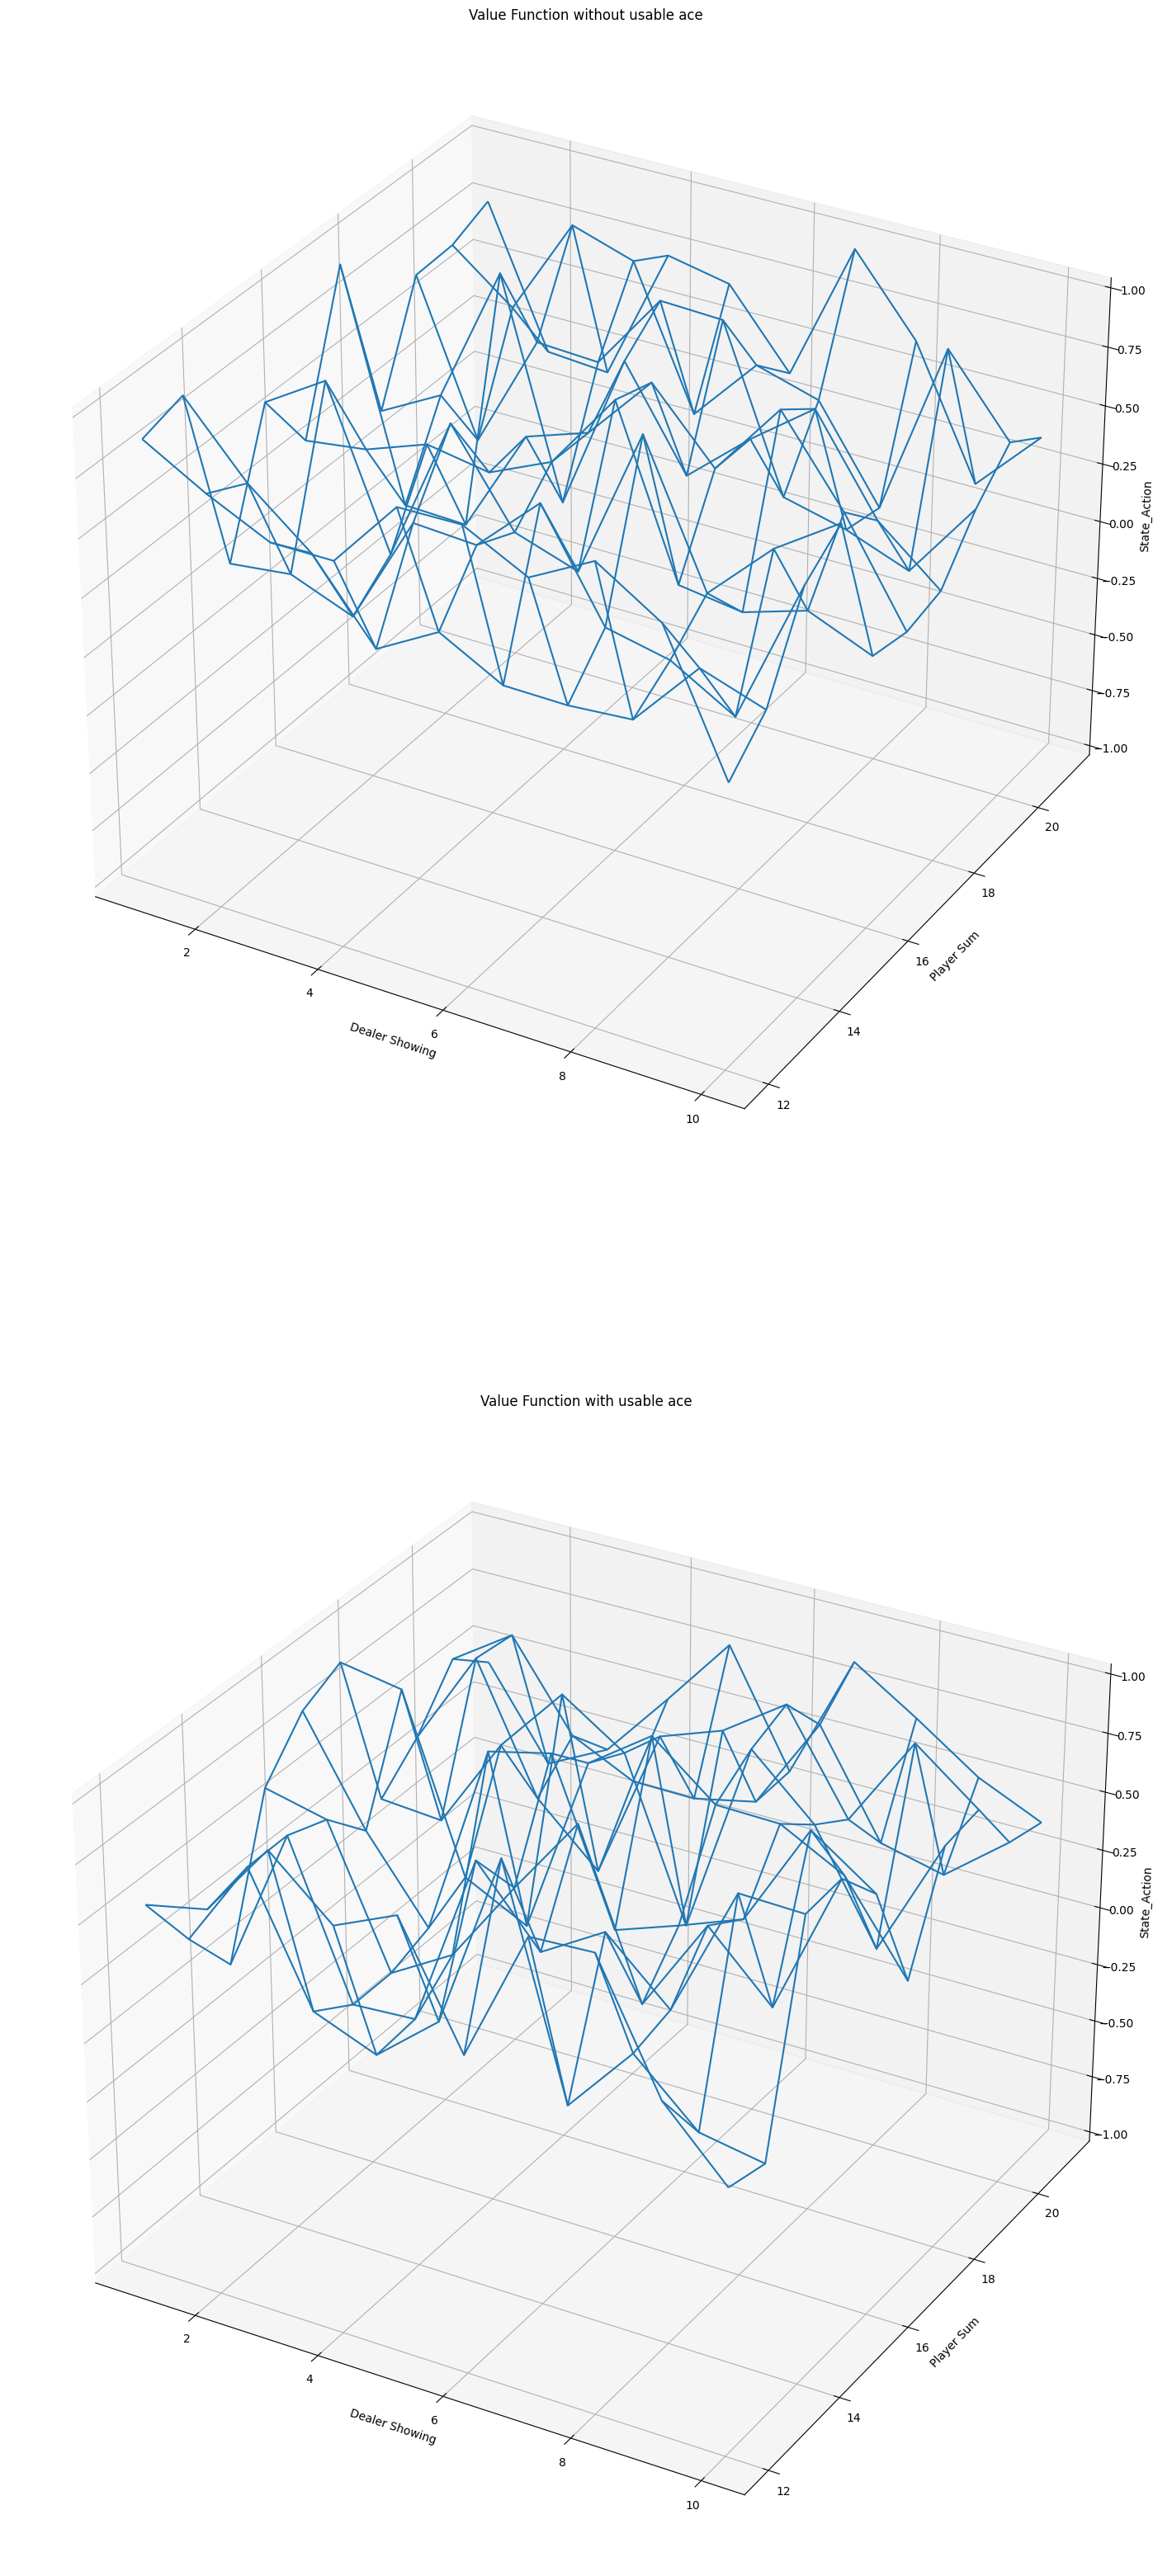

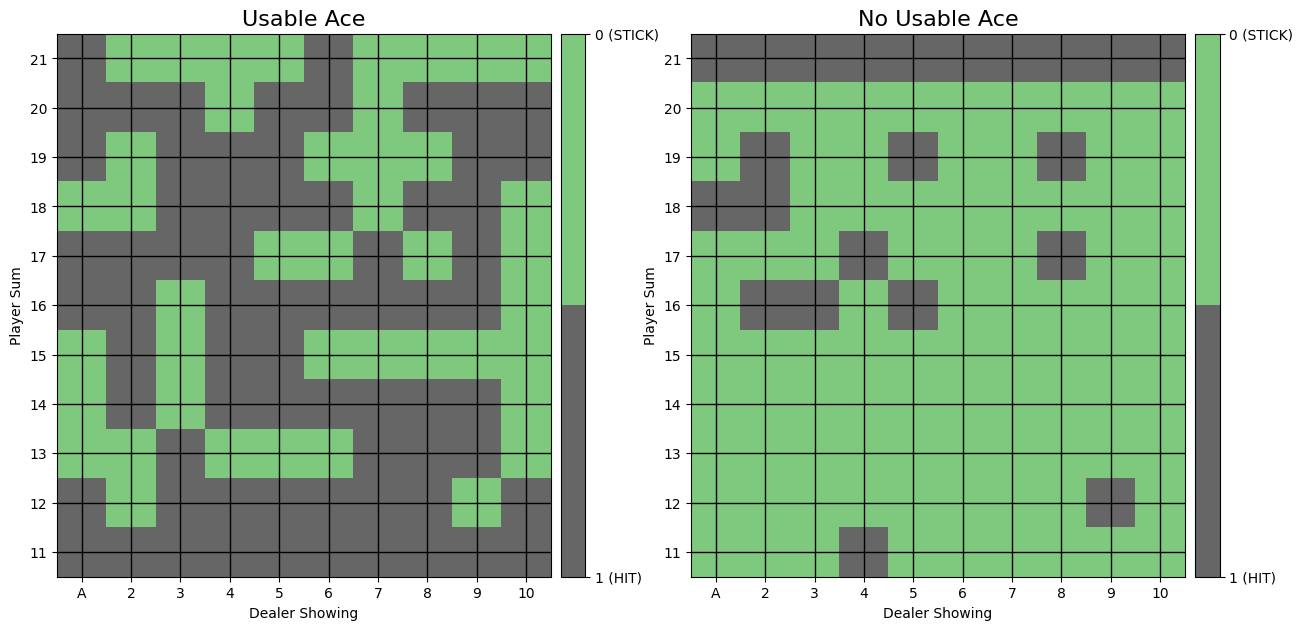

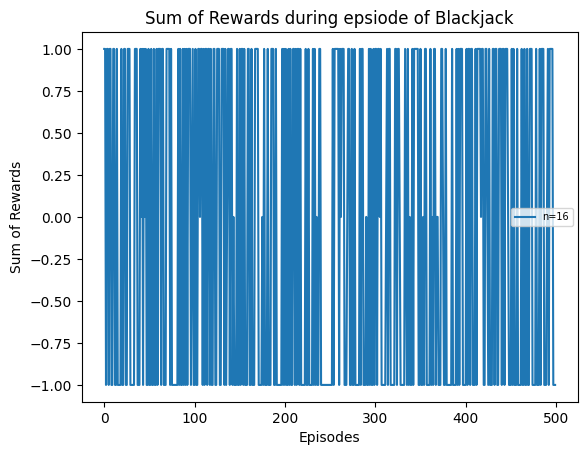

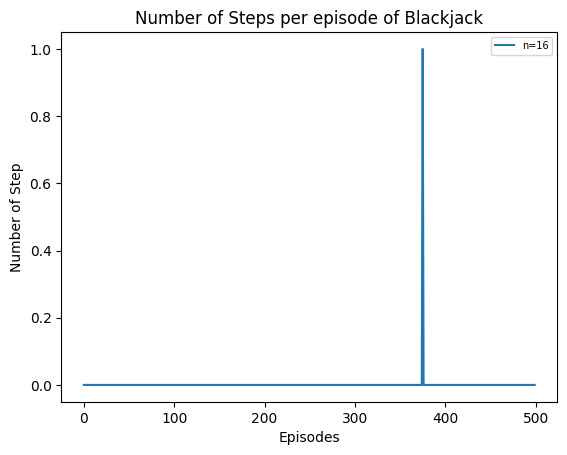

In [4]:
#############Plot Value Function###############
blackjack.plot_value_function(q_blackjack)
print('\n')

#############Plot Optimal Policy###############
blackjack.print_optimal_policy(policy_blackjack)
print('\n')

#############Plot sum of rewards###############
blackjack.plot_rewards(rewards_blackjack)
print('\n')

########Plot number of steps per episode#######
blackjack.plot_steps_episodes(num_step)
print('\n')

## Taxi

**Description**

There are four designated locations in the grid world indicated by R(ed), G(reen), Y(ellow), and B(lue). When the episode starts, the taxi starts off at a random square and the passenger is at a random location. The taxi drives to the passenger’s location, picks up the passenger, drives to the passenger’s destination (another one of the four specified locations), and then drops off the passenger. Once the passenger is dropped off, the episode ends.

Map:

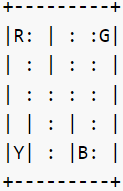

**Action Space**

There are two actions: 
- move south (0)
- move north (1)
- move east (2)
- move west (3)
- pickup passenger (4)
- drop off passenger (5)

**Observation Space**

There are 500 discrete states since there are 25 taxi positions, 5 possible locations of the passenger (including the case when the passenger is in the taxi), and 4 destination locations.

Note that there are 400 states that can actually be reached during an episode. The missing states correspond to situations in which the passenger is at the same location as their destination, as this typically signals the end of an episode. Four additional states can be observed right after a successful episodes, when both the passenger and the taxi are at the destination. This gives a total of 404 reachable discrete states.

The observation consists of a 4-tuple containing: taxi_row, taxi_col, passenger_location, destination

An observation is an integer that encodes the corresponding state. The state tuple can then be decoded with the “decode” method.

Passenger locations:

- 0: R(ed)
- 1: G(reen)
- 2: Y(ellow)
- 3: B(lue)
- 4: in taxi

Destinations:

- 0: R(ed)
- 1: G(reen)
- 2: Y(ellow)
- 3: B(lue)

**Rewards**
- per step unless other reward is triggered: -1
- delivering passenger: +20
- executing “pickup” and “drop-off” actions illegally: -10

In [5]:
taxi = mid_project.n_step_SARSA(env_taxi, n_episode=500, alpha=0.4, gamma=1.0, epsilon=0.01, n=16, tag="Taxi")
q_taxi, policy_taxi, rewards_taxi, num_step = taxi.play()

>I set the same values of parameters as Blackjack. However, I used different $\gamma$ value of 1.0 because Taxi should be able to benefit from the $\gamma$ being 1.0 since there is no random chance seen.



Optimal Policy of Taxi
[['D' '↓' '↓' '↓' '↓']
 ['D' '↓' 'D' 'D' '↓']
 ['D' 'D' '↓' '↓' '↓']
 ['D' 'D' 'D' 'D' 'D']
 ['D' '↓' '↓' '↓' '↓']]




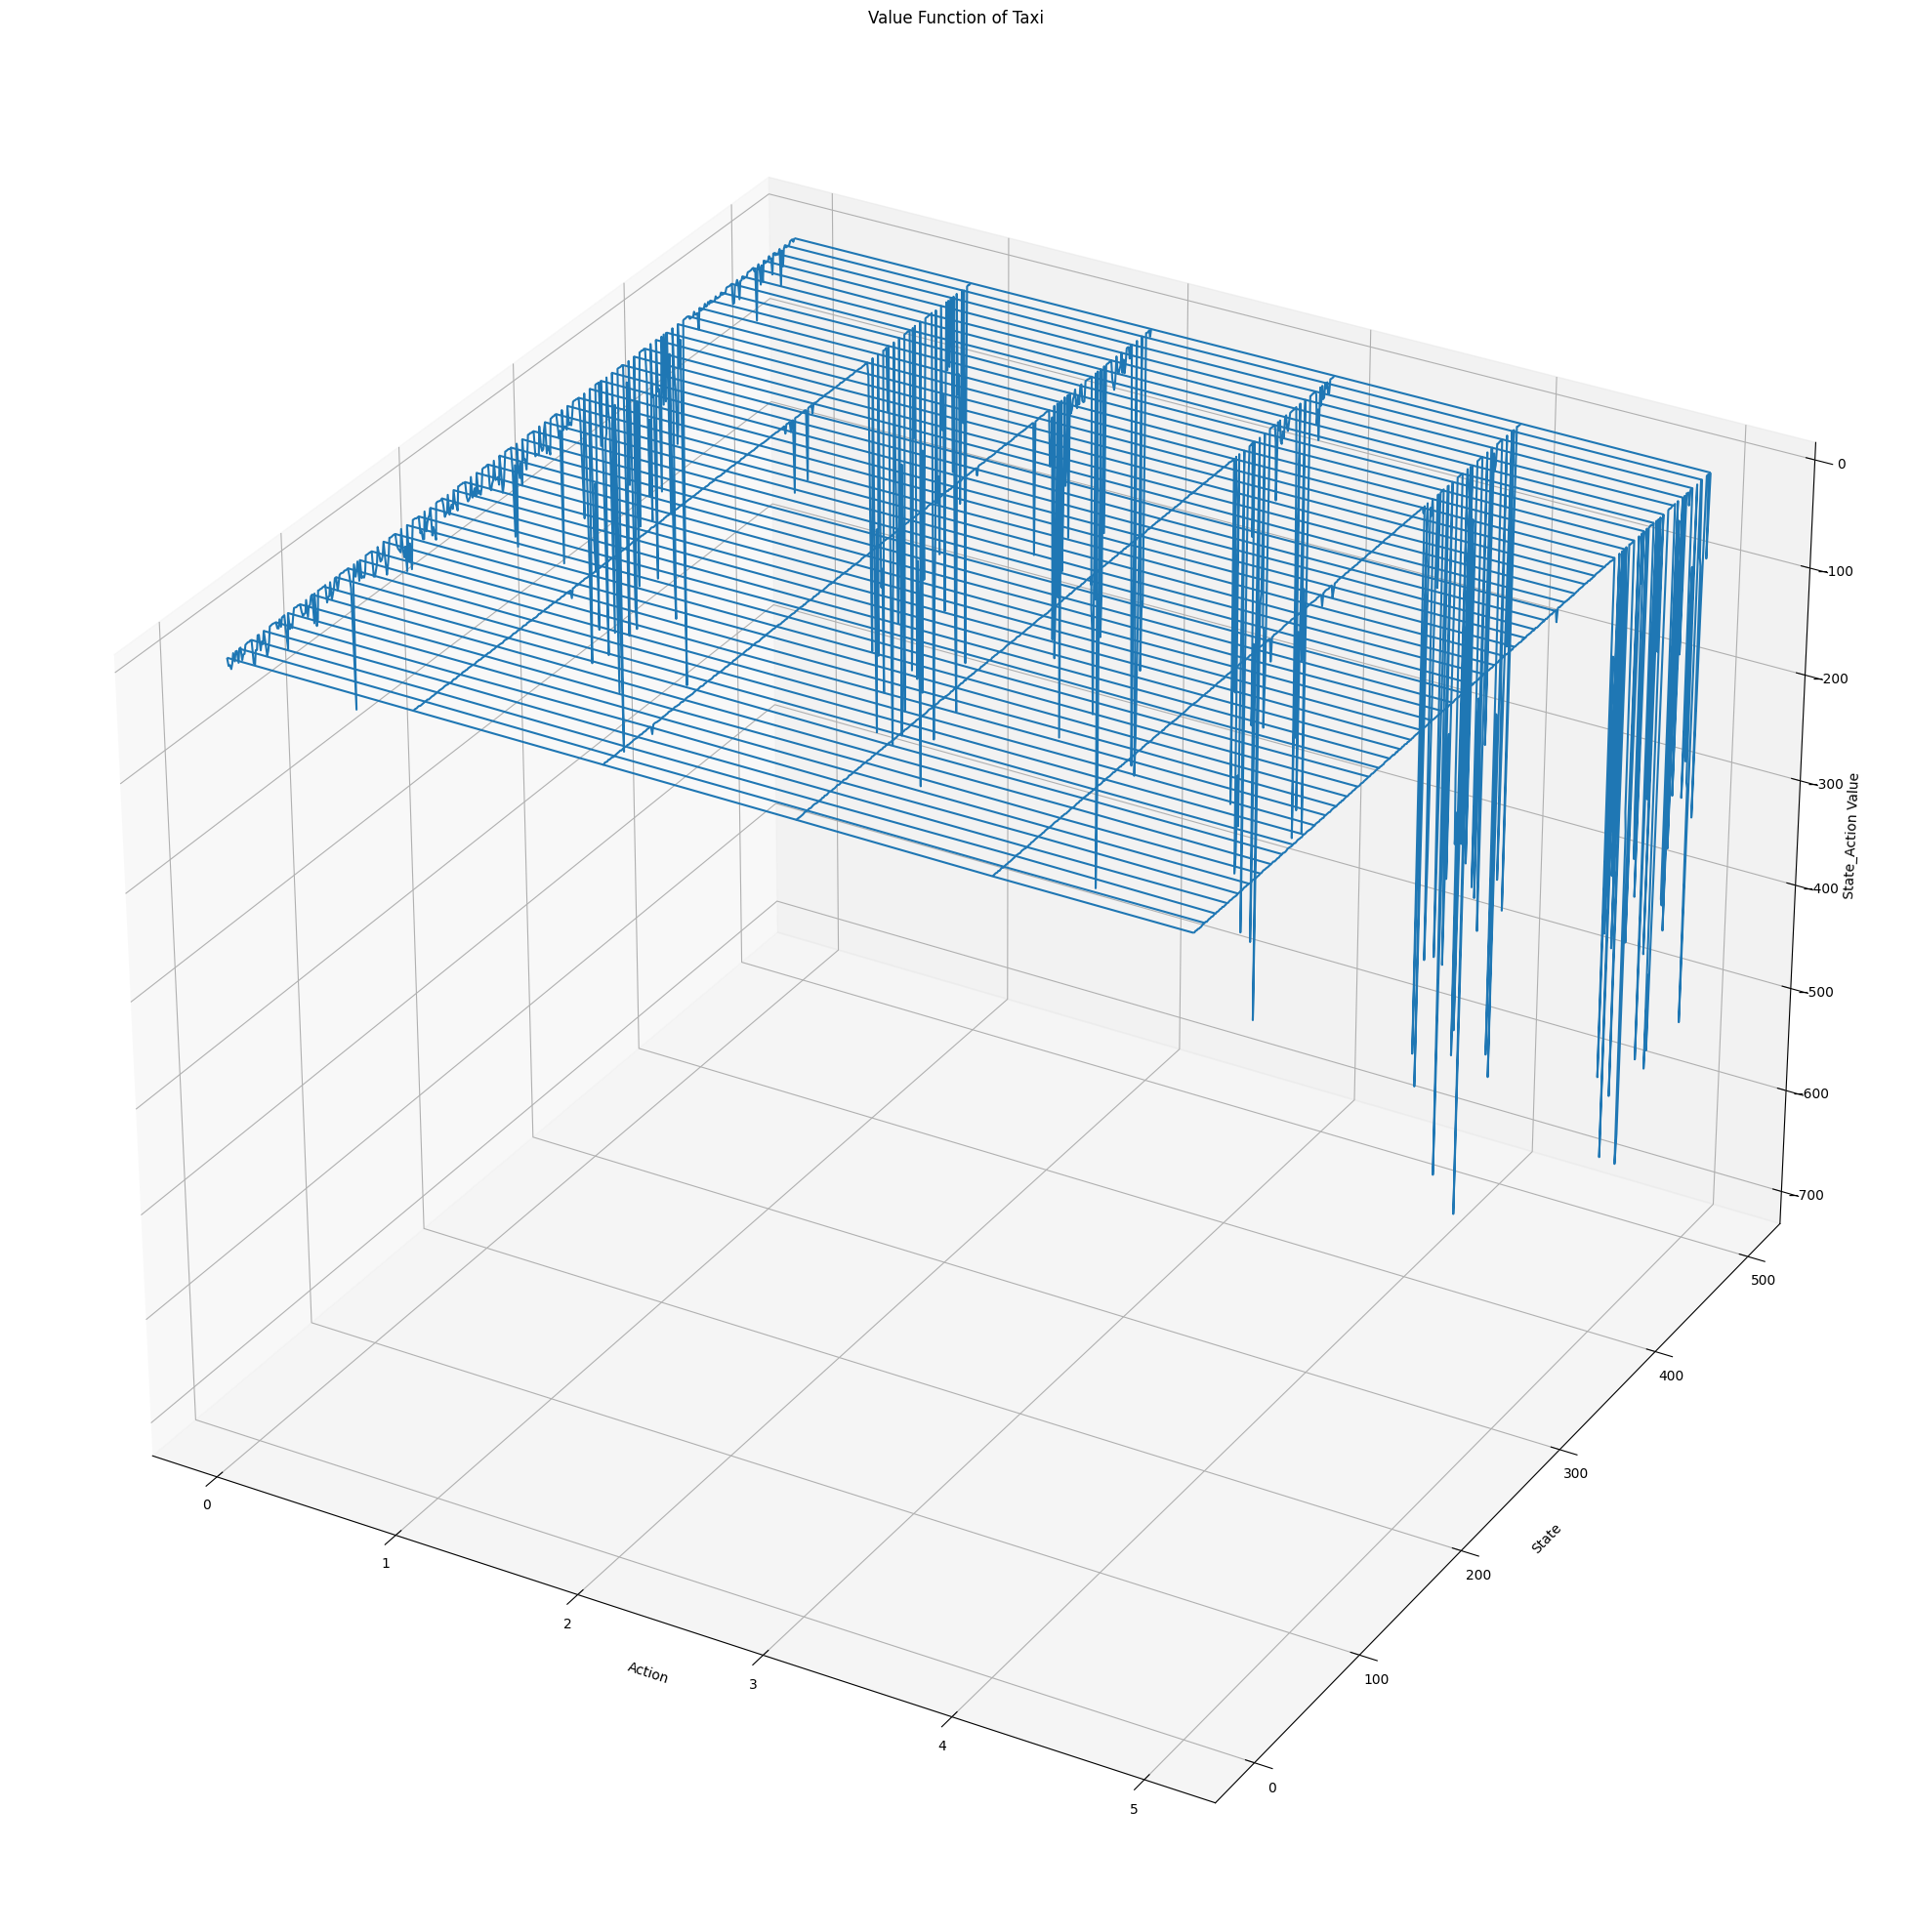

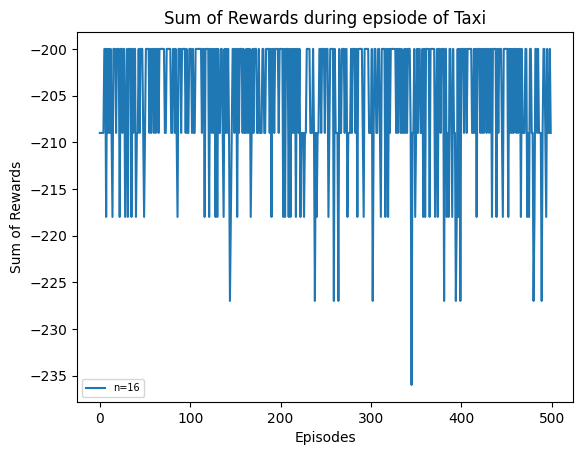

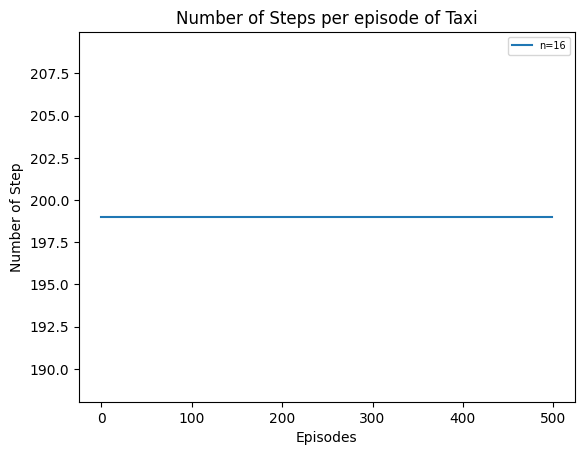

In [6]:
#############Plot Value Function###############
taxi.plot_value_function(q_taxi)
print('\n')

#############Plot Optimal Policy###############
taxi.print_optimal_policy(policy_taxi)
print('\n')

#############Plot sum of rewards###############
taxi.plot_rewards(rewards_taxi)
print('\n')

########Plot number of steps per episode#######
taxi.plot_steps_episodes(num_step)
print('\n')

## CliffWalking

**Description**

The board is a 4x12 matrix, with (using NumPy matrix indexing):

- `[3, 0]` as the start at bottom-left
- `[3, 11]` as the goal at bottom-right
- `[3, 1..10]` as the cliff at bottom-center

If the agent steps on the cliff, it returns to the start. An episode terminates when the agent reaches the goal.

**Action Space**

There are two actions: 
- move up (0)
- move right (1)
- move down (2)
- move left (3)

**Observation Space**

There are 3x12 + 1 possible states. In fact, the agent cannot be at the cliff, nor at the goal (as this results in the end of the episode). It remains all the positions of the first 3 rows plus the bottom-left cell. The observation is simply the current position encoded as flattened index.

**Rewards**
Each time step incurs -1 reward, and stepping into the cliff incurs -100 reward.

In [7]:
cliff = mid_project.n_step_SARSA(env_cliff, n_episode=500, alpha=0.4, gamma=1.0, epsilon=0.01, n=16, tag="CliffWalking")
q_cliff, policy_cliff, rewards_cliff, num_step = cliff.play()

>I set the same values of hyper-parameters as Blackjack and Taxi. However, I used different $\gamma$ value of 1.0 because The CliffWalking has to be able to benefit from the $\gamma$ being 1.0 since there is no randomness seen.



Optimal Policy of CliffWalking
[['↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↓' '↓' '↓']
 ['↑' '↑' '↑' '↑' '↑' '↑' '↓' '↓' '↑' '↓' '↓' '↓']
 ['↑' '↑' '↓' '↓' '↓' '↓' '↓' '↓' '↓' '↓' '↓' '↓']
 ['↑' '↓' '↓' '↓' '↓' '↓' '↓' '↓' '↓' '↓' '↓' '↓']]




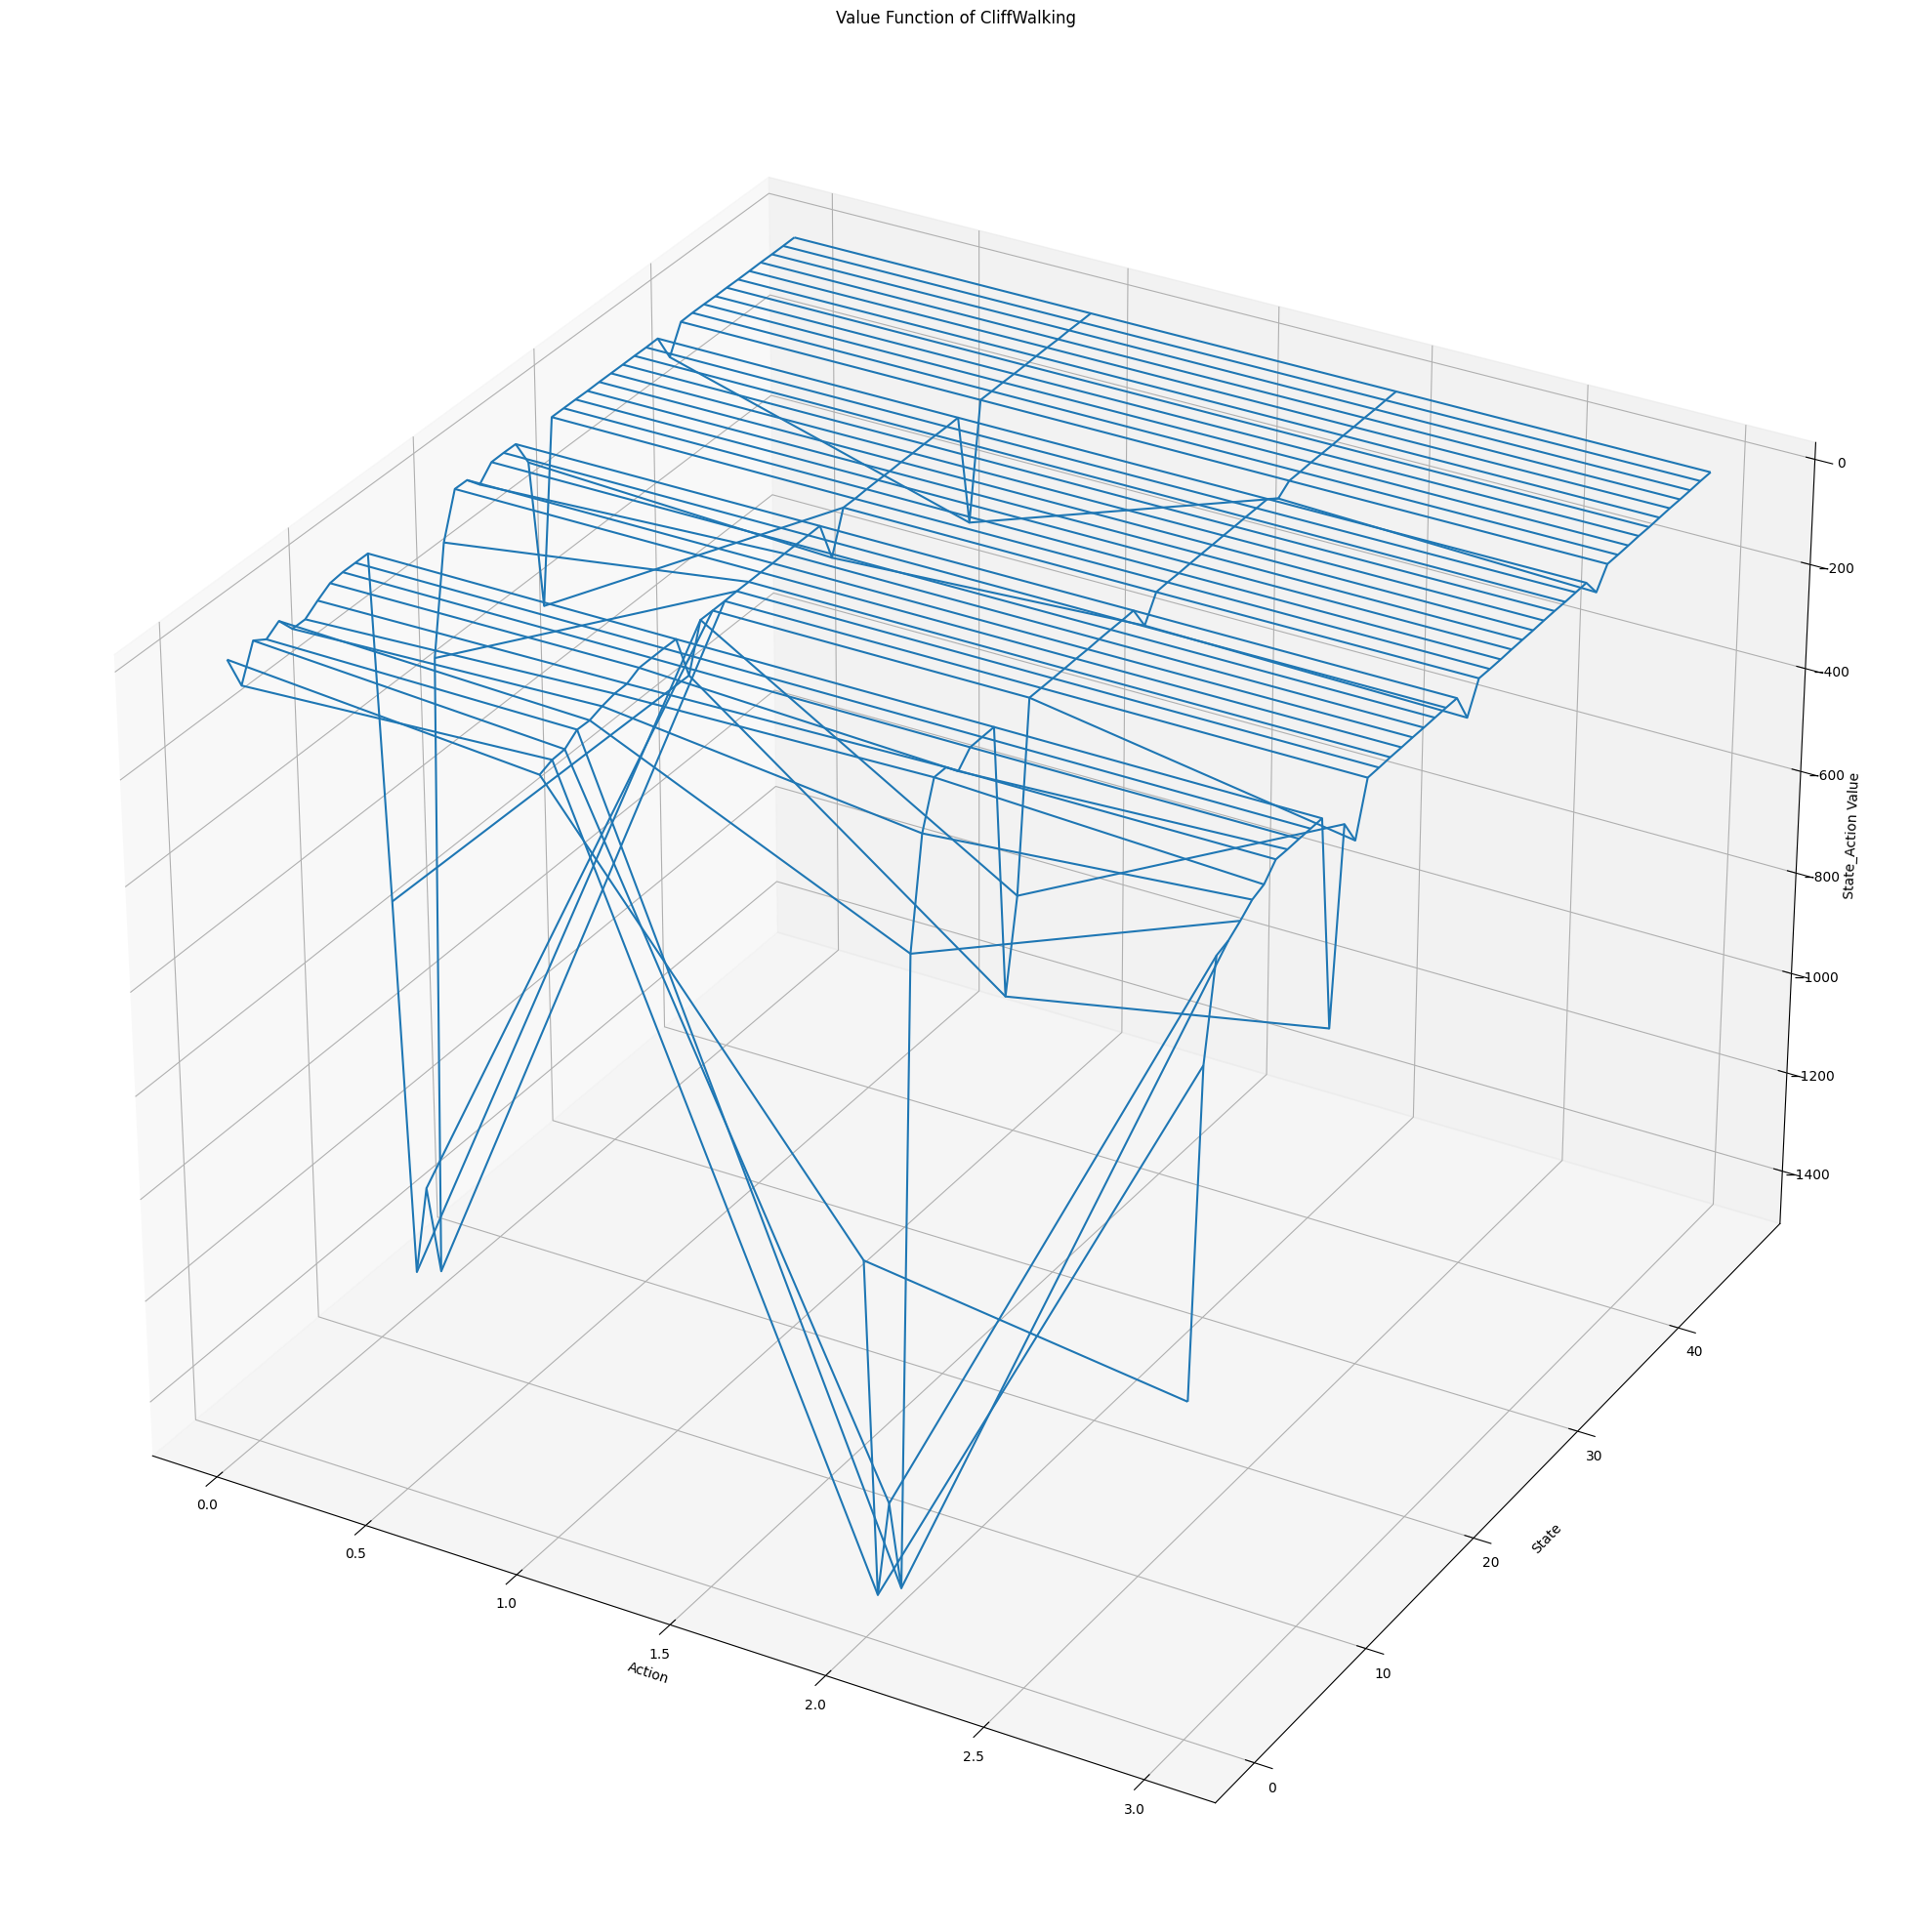

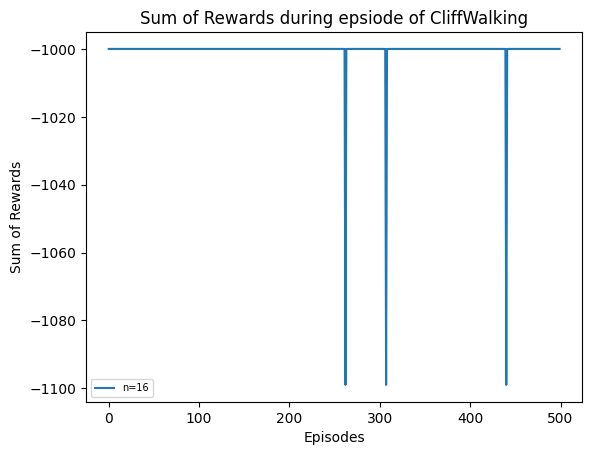

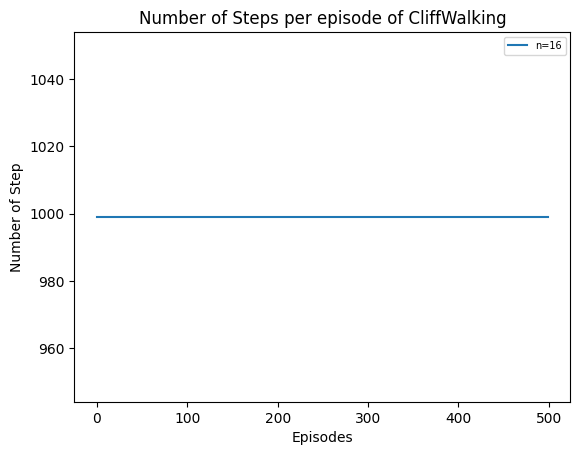

In [8]:
#############Plot Value Function###############
cliff.plot_value_function(q_cliff)
print('\n')

#############Plot Optimal Policy###############
cliff.print_optimal_policy(policy_cliff)
print('\n')

#############Plot sum of rewards###############
cliff.plot_rewards(rewards_cliff)
print('\n')

########Plot number of steps per episode#######
cliff.plot_steps_episodes(num_step)
print('\n')

## FrozenLake

**Description**

Frozen lake involves crossing a frozen lake from Start(S) to Goal(G) without falling into any Holes(H) by walking over the Frozen(F) lake. The agent may not always move in the intended direction due to the slippery nature of the frozen lake.

**Action Space**

There are two actions: 
- LEFT (0)
- DOWN (1)
- RIGHT (2)
- UP (3)

**Observation Space**

The observation is a value representing the agent’s current position as current_row * nrows + current_col (where both the row and col start at 0). For example, the goal position in the 4x4 map can be calculated as follows: 3 * 4 + 3 = 15. The number of possible observations is dependent on the size of the map. For example, the 4x4 map has 16 possible observations.

**Rewards**
- Reach goal(G): +1
- Reach hole(H): 0
- Reach frozen(F): 0

In [9]:
frozen = mid_project.n_step_SARSA(env_frozen, n_episode=500, alpha=0.4, gamma=0.9, epsilon=0.01, n=16, tag="FrozenLake")
q_frozen, policy_frozen, rewards_frozen, num_step = frozen.play()

> My hyper-parameters value of FrozenLake is same as Blackjack, Taxi, and CliffWalking. However, I used the different $\gamma$ value of 0.9 from other environments. For the FrozenLake, since there is a random chance the agent will slip, sot $\gamma$ can be used at something like about 0.9 to 0.99. However, I chose 0.9.



Optimal Policy of FrozenLake
[['←' '←' '↑' '↑']
 ['←' '↑' '↑' '↑']
 ['←' '←' '↑' '↑']
 ['↑' '←' '↑' '↑']]




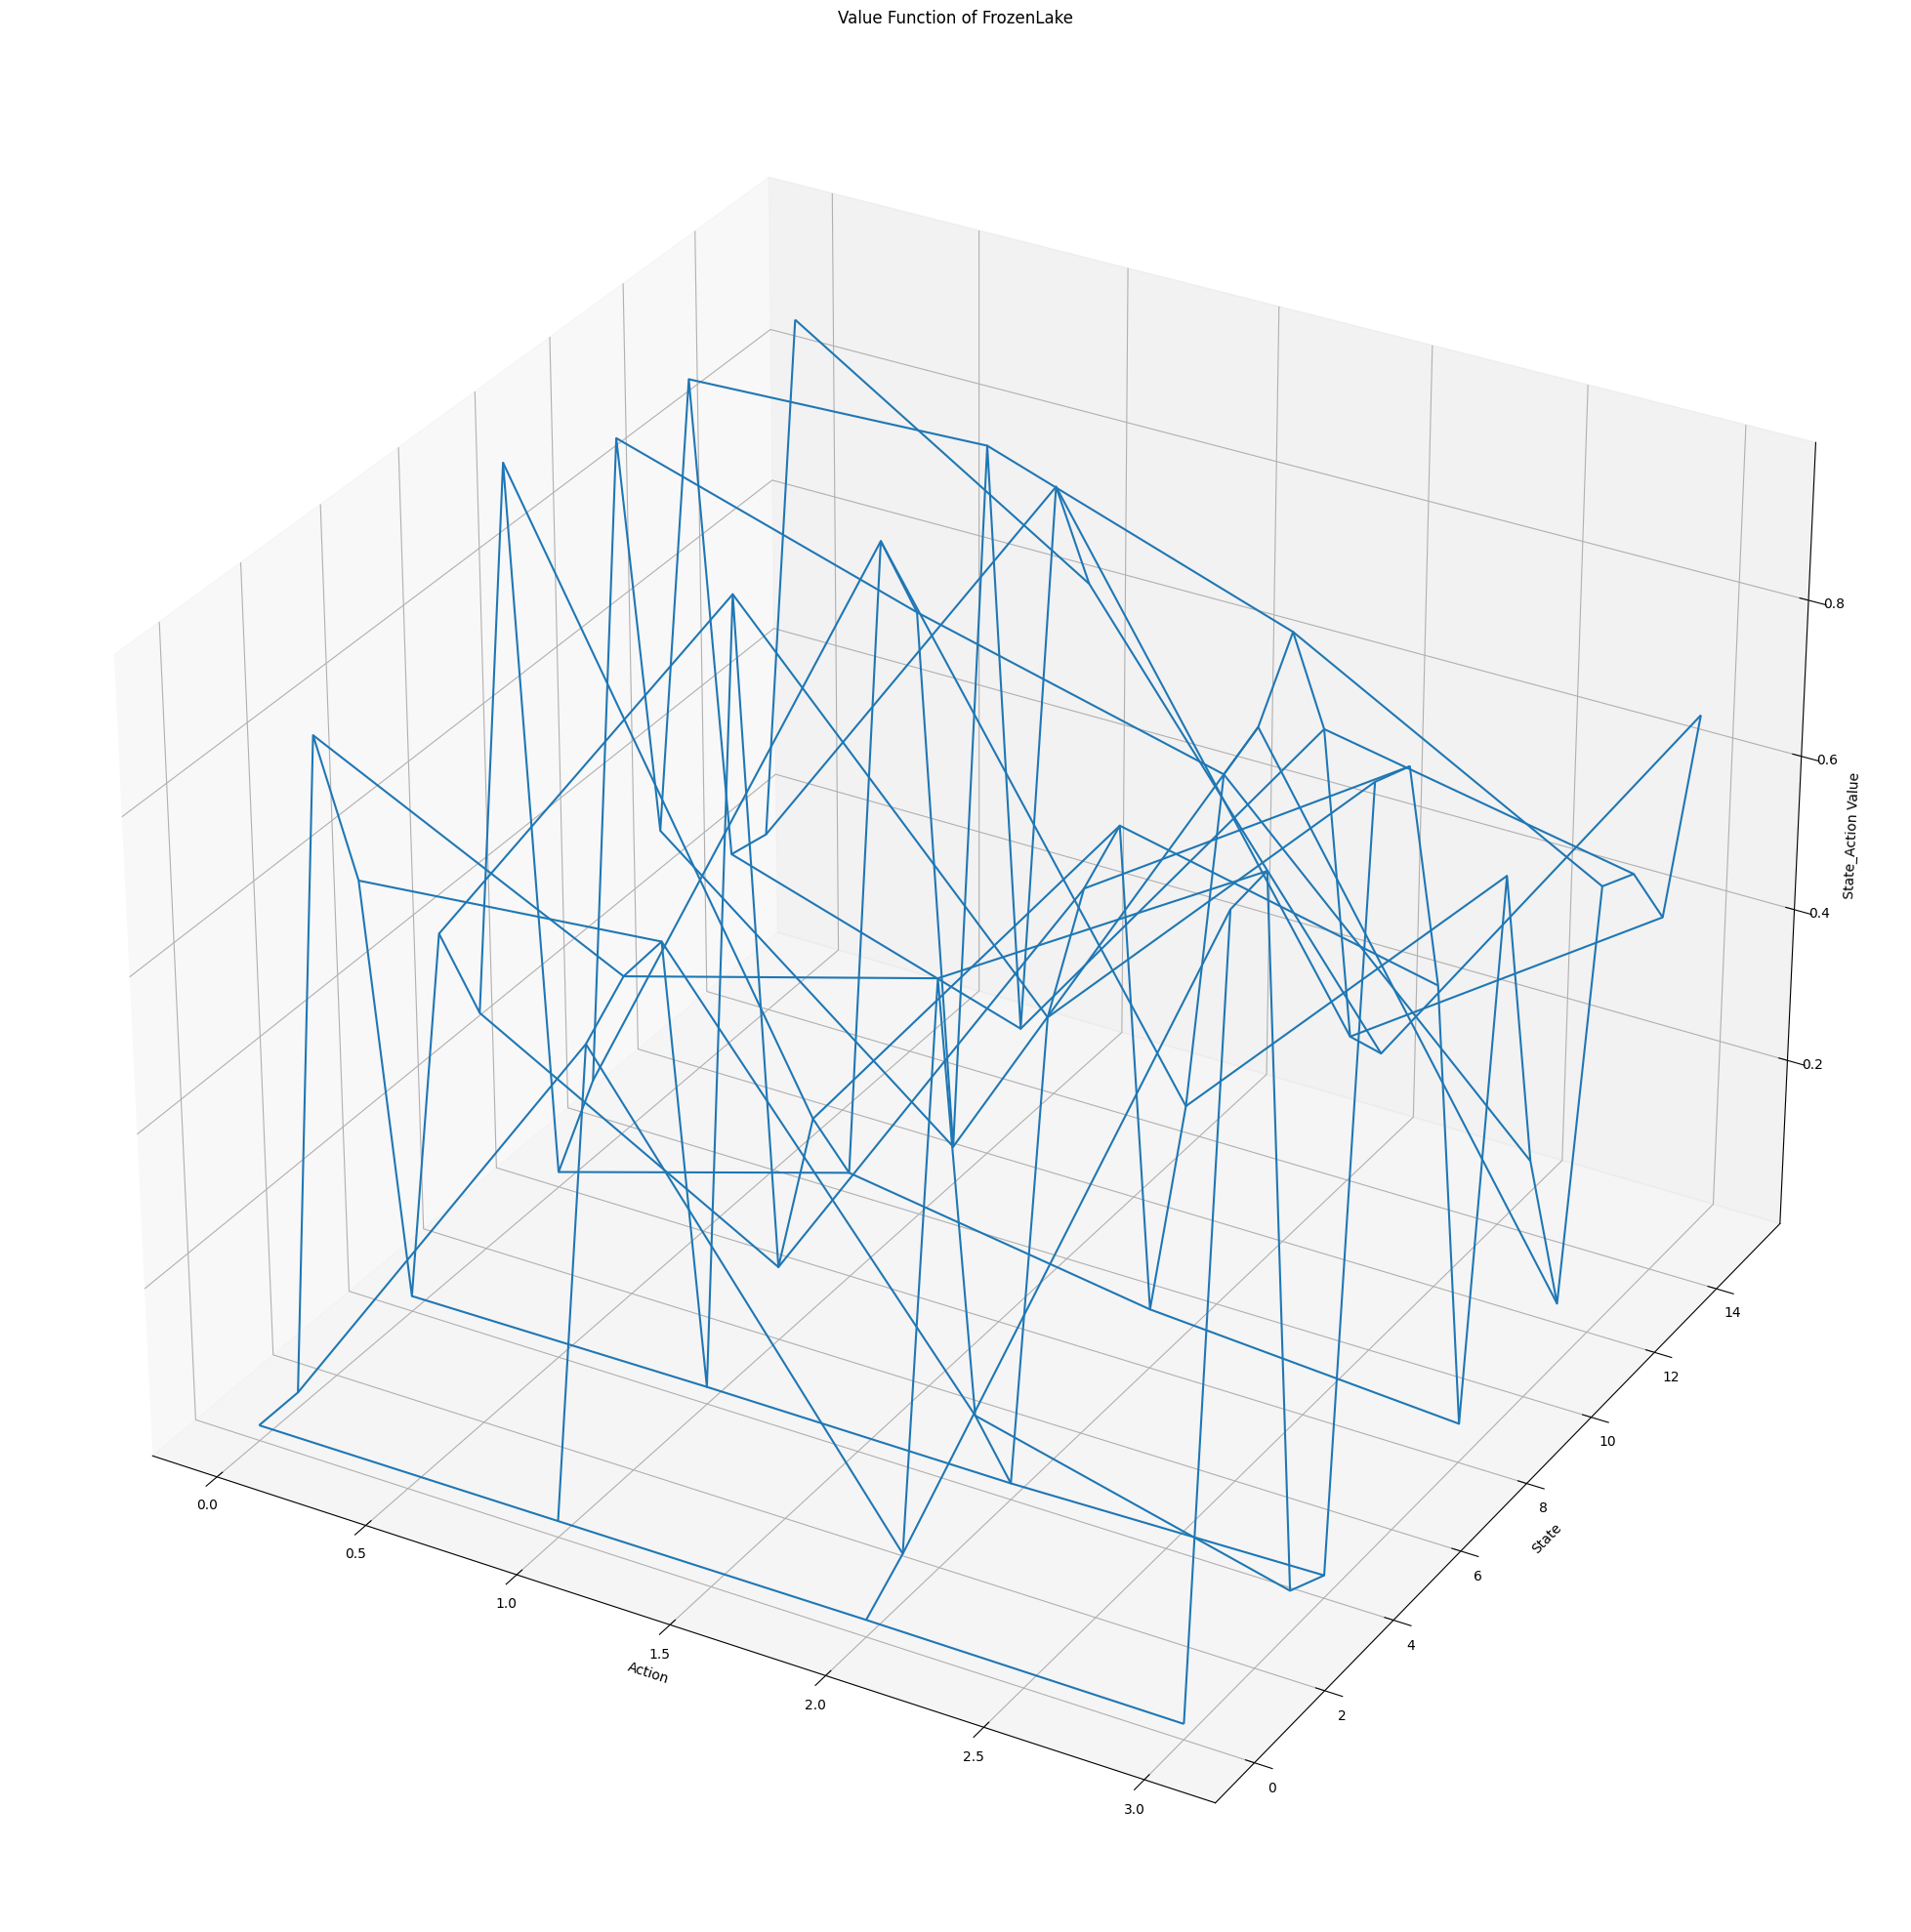

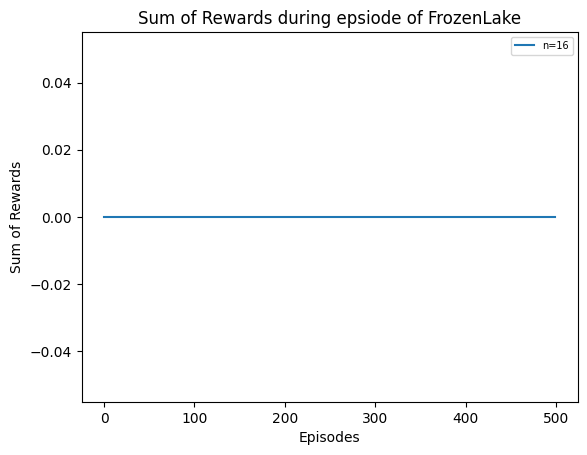

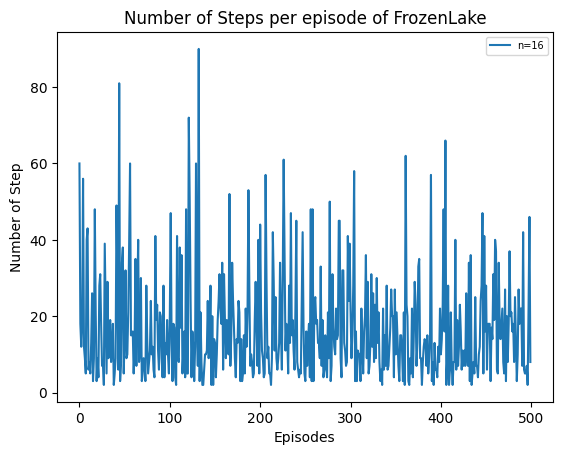

In [10]:
#############Plot Value Function###############
frozen.plot_value_function(q_frozen)
print('\n')

#############Plot Optimal Policy###############
frozen.print_optimal_policy(policy_frozen)
print('\n')

#############Plot sum of rewards###############
frozen.plot_rewards(rewards_frozen)
print('\n')

########Plot number of steps per episode#######
frozen.plot_steps_episodes(num_step)
print('\n')